In [5]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 934.5 kB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [8]:
book=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/association%20rules/book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [9]:
frequent_itemsets=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [10]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [11]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [12]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


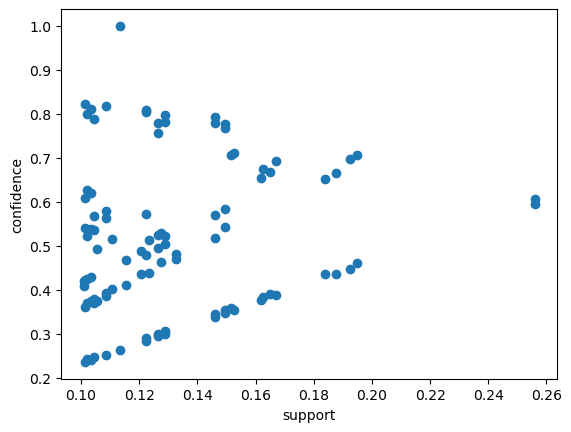

In [13]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [14]:
frequent_itemsets2=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [15]:
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


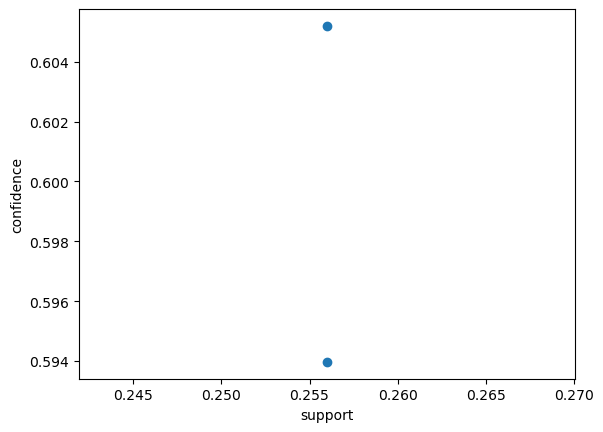

In [16]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [17]:
frequent_itemsets3=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, GeogBks, CookBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(ArtBks, DoItYBks, GeogBks, CookBks)"
98,0.0510,"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)"


In [18]:
rules3=association_rules(frequent_itemsets3,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(CookBks, DoItYBks, ChildBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(DoItYBks),"(CookBks, ArtBks, ChildBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(ChildBks),"(CookBks, DoItYBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417


In [19]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(CookBks, DoItYBks, ChildBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923
659,(DoItYBks),"(CookBks, ArtBks, ChildBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(ChildBks),"(CookBks, DoItYBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417


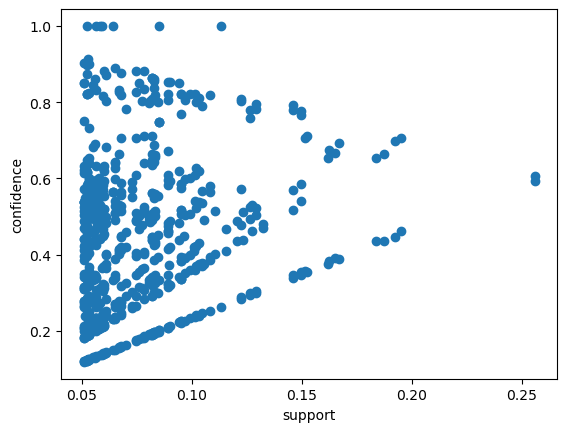

In [20]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [21]:
#Q2

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [24]:
movie=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/association%20rules/my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [25]:
movie.shape

(10, 15)

In [26]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [27]:
movie2=movie.iloc[:,5:]
movie2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [28]:
frequent_itemsets=apriori(movie2,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [29]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
247,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [30]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
247,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


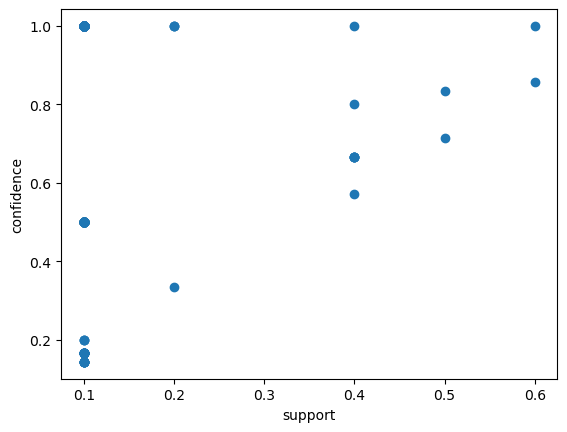

In [31]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [32]:
frequent_itemsets2=apriori(movie2,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [33]:
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
234,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
235,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [34]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
233,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
234,(Sixth Sense),"(Harry Potter1, LOTR2, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
235,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
236,(Green Mile),"(Harry Potter1, Sixth Sense, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


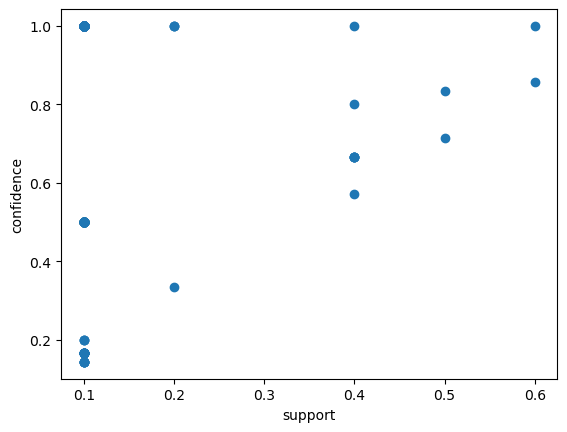

In [35]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()